<img src="EEB.jpg" width="800" />

## Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools

### Source -- Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK

#### Data Set Information:
We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. Then the Energy Load of building is classified as LOW , MEDIUM And HIGH based on the predicted real valued responses

#### Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:<br/>
X1 Relative Compactness <br/>
X2 Surface Area <br/>
X3 Wall Area <br/>
X4 Roof Area <br/>
X5 Overall Height<br/>
X6 Orientation<br/>
X7 Glazing Area<br/>
X8 Glazing Area Distribution<br/>
y1 Heating Load<br/>
y2 Cooling Load<br/>




*  Basic Explorataory analysis was performed on the dataset.
*  Since there are two dependent variables I have evaluated two models one with heat_loading and the other with cool_loading.
*  Basic models such as linear regression ,Ridge Regression , lasso regression,decision Tree Regressor were evaluate and their R2 score was computed.
*  As expected Decision Tree has the highest test and train scores and it is over fitting. 
*  Ensemble methods such as Random Forest , Bagging , Ada boost were used on both the models and their test and train score were evaluated.
*   At last using Neural Network I  have classified the combined heating and cooling load (total load) as low,medium,high with a 90.91% Accuracy

In [3]:
data=pd.read_csv("ENB2012_data.csv")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import seaborn as sns
%matplotlib inline

# Exploratory Analysis

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [25]:
X=data.drop(['Y1','Y2'],axis=1)
y=data[['Y1','Y2']]
y1=data['Y1']
y2=data['Y2']

In [12]:
X.describe()

,X1,X2,X3,X4,X5,X6,X7,X8
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000CFCD56A400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000CFCD91DEF0>]], dtype=object)

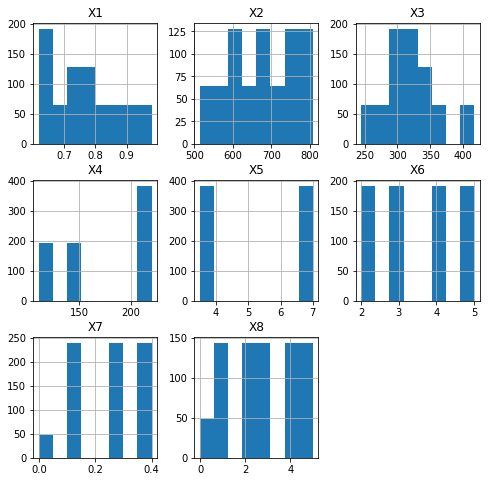

In [14]:
X.hist(bins=8,figsize=(8,8))

In [18]:
data.shape

(768, 10)

(array([ 118.,  204.,   61.,   29.,   73.,   94.,   98.,   56.,   21.,   14.]),
 array([ 10.9  ,  14.613,  18.326,  22.039,  25.752,  29.465,  33.178,
         36.891,  40.604,  44.317,  48.03 ]),
 <a list of 10 Patch objects>)

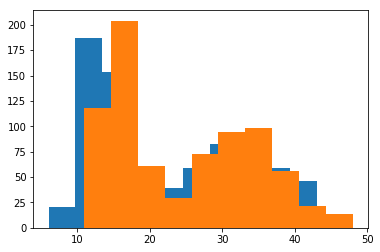

In [26]:
plt.hist((y1))

plt.hist((y2))

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y1,test_size=0.2,random_state=10)
X2_train,X2_test,y2_train,y2_test=train_test_split(X,y2,test_size=0.2,random_state=10)


# Linear Regression

In [85]:
lr=LinearRegression()
lr.fit(X1_train,y1_train)
lr.fit(X2_train,y2_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
print('Train score: {0:0.2f}'.format(lr.score(X1_train,y1_train)))
print('Train score: {0:0.2f}'.format(lr.score(X2_train,y2_train)))
print('Test score: {0:0.2f}'.format(lr.score(X1_test,y1_test)))
print('Test score: {0:0.2f}'.format(lr.score(X2_test,y2_test)))

Train score: 0.85
Train score: 0.88
Test score: 0.87
Test score: 0.91


In [88]:
lr.predict(X1_test)
lr.predict(X2_test)

array([ 19.38841623,  19.86636923,  14.21466747,  29.85930237,
        19.87720821,  10.84766993,  14.82662443,  32.19983858,
        31.66665361,  17.81705174,  29.78607694,  16.8635108 ,
        13.91131478,  32.46583996,  34.52599644,  19.0400956 ,
        39.92213944,  13.72954421,  33.70165426,  13.98689738,
        29.69965536,  15.96884688,  31.98260243,  31.63476113,
        17.24594051,  27.68270968,  15.34368588,  33.56528524,
        29.92244596,  17.59469475,  14.79661768,  15.09936246,
        15.78926708,  34.84194526,  32.14224944,  29.34049575,
        31.71660105,  12.06808941,  18.12216158,  27.18718105,
        17.73106377,  27.54634066,  33.88123406,  32.12181584,
        34.36155212,  39.78577042,  17.06636071,  31.93939164,
        12.47045982,  35.88824807,  13.65396161,  35.62544171,
        15.38689667,  17.66984374,  34.11598434,  18.95367402,
        15.96928049,  15.00620423,  14.65378127,  30.01171193,
        31.67339026,  18.20858316,  17.80621276,  34.88

In [89]:
#Linear Regression with Scaling
scaler = MinMaxScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [97]:
lrs1=LinearRegression()
lrs2=LinearRegression()
lrs1.fit(X1_train_scaled,y1_train)
lrs2.fit(X2_train_scaled,y2_train)
print('Linear reg1 Train score: {0:0.4f}'.format(lrs1.score(X1_train_scaled,y1_train)))
print('Linear reg1 Train score: {0:0.4f}'.format(lrs1.score(X2_train_scaled,y2_train)))
print('Linear reg2 Test score: {0:0.4f}'.format(lrs2.score(X1_test_scaled,y1_test)))
print('Linear reg2 Test score: {0:0.4f}'.format(lrs2.score(X2_test_scaled,y2_test)))

Linear reg1 Train score: 0.9123
Linear reg1 Train score: 0.8110
Linear reg2 Test score: 0.8660
Linear reg2 Test score: 0.9080


# Ridge Regression

In [101]:
from sklearn.linear_model import Ridge
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100]}
ridge=Ridge()              

grid_search1 = GridSearchCV(ridge, param_grid, cv=5)
grid_search2 = GridSearchCV(ridge, param_grid, cv=5)

grid_search1.fit(X1_train, y1_train)
grid_search2.fit(X2_train, y2_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [108]:
print('Best parameters model1{}'.format(grid_search1.best_params_))
print('Best parameters model2{}'.format(grid_search2.best_params_))
print('Best score model1 {:.2f}'.format(grid_search1.best_score_))
print('Best score model2 {:.2f}'.format(grid_search2.best_score_))


Best parameters model1{'alpha': 0.001}
Best parameters model2{'alpha': 0.001}
Best score model1 0.91
Best score model2 0.88


In [103]:
from sklearn.linear_model import Ridge

linridge1 = Ridge(alpha=0.001).fit(X1_train_scaled, y1_train)
linridge2 = Ridge(alpha=0.001).fit(X2_train_scaled, y2_train)


print('ridge regression linear model1 intercept: {}'
     .format(linridge1.intercept_))
print('ridge regression linear model1 coeff:\n{}'
     .format(linridge1.coef_))

print('Number of non-zero features: {}'
     .format(np.sum(linridge1.coef_ != 0)))

ridge regression linear model1 intercept: 28.941003644318616
ridge regression linear model1 coeff:
[-22.22266313  -8.01226663   0.88868768 -11.3742237   15.37787437
  -0.05571524   8.15788575   1.05825817]
Number of non-zero features: 8


In [106]:
print('Ridge1 R-squared score (training): {:.3f}'
     .format(linridge1.score(X1_train_scaled, y1_train)))
print('Ridge2 R-squared score (training): {:.3f}'
     .format(linridge2.score(X2_train_scaled, y2_train)))
print('Ridge1 R-squared score (test): {:.3f}'
     .format(linridge1.score(X1_test_scaled, y2_test)))
print('Ridge2 R-squared score (test): {:.3f}'
     .format(linridge2.score(X1_test_scaled, y2_test)))

Ridge1 R-squared score (training): 0.912
Ridge2 R-squared score (training): 0.882
Ridge1 R-squared score (test): 0.849
Ridge2 R-squared score (test): 0.908


# Lasso Regression

In [110]:
from sklearn.linear_model import Lasso
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100]}
lasso=Lasso(max_iter=10000)              

grid_searchls1 = GridSearchCV(lasso, param_grid, cv=5)
grid_searchls2 = GridSearchCV(lasso, param_grid, cv=5)

grid_searchls1.fit(X1_train_scaled, y1_train)
grid_searchls2.fit(X2_train_scaled, y2_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [111]:
print('Best parameters model1{}'.format(grid_searchls1.best_params_))
print('Best parameters model2{}'.format(grid_searchls2.best_params_))
print('Best score model1 {:.2f}'.format(grid_searchls1.best_score_))
print('Best score model2 {:.2f}'.format(grid_searchls2.best_score_))

Best parameters model1{'alpha': 0.001}
Best parameters model2{'alpha': 0.001}
Best score model1 0.91
Best score model2 0.88


In [114]:
lasso = Lasso(max_iter = 10000,alpha=0.001)
ls1=lasso.fit(X1_train_scaled, y1_train)
ls2=lasso.fit(X2_train_scaled, y2_train)

print("Lasso R-squared model1 value Train:{:.2f}".format(lasso.score(X1_train_scaled, y1_train)))
print("Lasso R-squared model2 value Train:{:.2f}".format(lasso.score(X2_train_scaled, y2_train)))
print(" Lasso R-squared model1 value Test:{:.2f}".format(lasso.score(X1_test_scaled, y1_test)))
print(" Lasso R-squared model2 value Test:{:.2f}".format(lasso.score(X1_test_scaled, y2_test)))

Lasso R-squared model1 value Train:0.85
Lasso R-squared model2 value Train:0.88
 Lasso R-squared model1 value Test:0.87
 Lasso R-squared model2 value Test:0.91


# Decision Tree 

In [115]:
from sklearn.tree import DecisionTreeRegressor
parameters = {'max_depth':range(3,20), "min_samples_split": [2, 10, 20], "min_samples_leaf": [1, 5, 10], 
              "max_leaf_nodes": [None, 5, 10, 20]}
grid = GridSearchCV(DecisionTreeRegressor(), parameters,)
grid_result1 = grid.fit(X1_train_scaled, y1_train)
grid_result2 = grid.fit(X2_train_scaled, y2_train)
print('Best parameters model1{}'.format(grid_result1.best_params_))
print('Best parameters model2{}'.format(grid_result2.best_params_))
print('Best score model1 {:.2f}'.format(grid_result1.best_score_))
print('Best score model2 {:.2f}'.format(grid_result2.best_score_))

Best parameters model1{'max_depth': 7, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best parameters model2{'max_depth': 7, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best score model1 0.96
Best score model2 0.96


In [117]:
dt_clf1 = DecisionTreeRegressor(max_depth=7, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split= 2)
dt_clf2 = DecisionTreeRegressor(max_depth=7, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split= 2)
dt_clf1.fit(X1_train_scaled,y1_train)
dt_clf2.fit(X2_train_scaled,y2_train)

y_dt_clf1 = dt_clf1.predict(X1_test_scaled)
print('Train score: {0:0.4f}'.format(dt_clf1.score(X1_train_scaled, y1_train)))
print('Train score: {0:0.4f}'.format(dt_clf2.score(X2_train_scaled, y2_train)))
print('Test score: {0:0.4f}'.format(dt_clf1.score(X1_test_scaled, y1_test)))
print('Test score: {0:0.4f}'.format(dt_clf2.score(X2_test_scaled, y2_test)))

Train score: 0.9967
Train score: 0.9722
Test score: 0.9968
Test score: 0.9652


# Ensemble
## Random Forest

In [118]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor( max_features='sqrt', oob_score = True) 

param_grid = { 
           "n_estimators" : range(50,59),
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
grid_result3 = grid.fit(X1_train_scaled, y1_train)
grid_result4 = grid.fit(X2_train_scaled, y2_train)
print('Best parameters model1{}'.format(grid_result3.best_params_))
print('Best parameters model2{}'.format(grid_result4.best_params_))

Best parameters model1{'max_depth': 25, 'min_samples_leaf': 1, 'n_estimators': 55}
Best parameters model2{'max_depth': 25, 'min_samples_leaf': 1, 'n_estimators': 55}


In [119]:
rf_clf1 = RandomForestRegressor(max_depth=25, min_samples_leaf=2, n_estimators=18)
rf_clf2 = RandomForestRegressor(max_depth=25, min_samples_leaf=2, n_estimators=18)
rf_clf1.fit(X1_train_scaled,y1_train)
rf_clf2.fit(X2_train_scaled,y2_train)

y_rf_clf1 = rf_clf.predict(X1_test_scaled)
print('Train score model1: {0:0.2f}'.format(rf_clf1.score(X1_train_scaled, y1_train)))
print('Train score model2: {0:0.2f}'.format(rf_clf2.score(X2_train_scaled, y2_train)))
print('Test score model1: {0:0.2f}'.format(rf_clf1.score(X1_test_scaled, y1_test)))
print('Test score model2: {0:0.2f}'.format(rf_clf2.score(X2_test_scaled, y2_test)))

Train score model1: 1.00
Train score model2: 0.99
Test score model1: 1.00
Test score model2: 0.97


# Bagging on Base models

In [127]:
from sklearn.ensemble import BaggingRegressor
#bagging on linear and regression models
scaler = MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)
bagginglr1 = BaggingRegressor(lrs1, max_samples=0.8, max_features=0.2, bootstrap = True, oob_score=True)
bagginglr2 = BaggingRegressor(lrs2, max_samples=0.8, max_features=0.2, bootstrap = True, oob_score=True)
bagginglg1 = BaggingRegressor(linridge1, max_samples=0.8, max_features=0.2, bootstrap = True, oob_score=True)
bagginglg2 = BaggingRegressor(linridge2, max_samples=0.8, max_features=0.2, bootstrap = True, oob_score=True)
baggingdt1 = BaggingRegressor(dt_clf1, max_samples=0.8, max_features=0.2, bootstrap = True, oob_score=True)
baggingdt2 = BaggingRegressor(dt_clf2, max_samples=0.8, max_features=0.2, bootstrap = True, oob_score=True)

bagginglr1.fit(X_scaled,y1)
bagginglr2.fit(X_scaled,y2)
bagginglg1.fit(X_scaled,y1)
bagginglg2.fit(X_scaled,y2)
baggingdt1.fit(X_scaled,y1)
baggingdt2.fit(X_scaled,y2)

print('Train score linear model1: {0:0.2f}'.format(bagginglr1.score(X_scaled,y1)))
print('Train scorelinear model2: {0:0.2f}'.format(bagginglr2.score(X_scaled,y2)))
print('out of bag score linear model1: {0:0.2f}'.format(bagginglr1.oob_score_))
print('out of bag score linear model2: {0:0.2f}'.format(bagginglr2.oob_score_))
print(" \n")
print('Train score ridge model1: {0:0.2f}'.format(bagginglg1.score(X_scaled,y1)))
print('Train score ridge model2: {0:0.2f}'.format(bagginglg2.score(X_scaled,y2)))
print('out of bag score ridge model1: {0:0.2f}'.format(bagginglg1.oob_score_))
print('out of bag score ridge model2: {0:0.2f}'.format(bagginglg2.oob_score_))
print(" \n")
print('Train score decision tree1: {0:0.2f}'.format(baggingdt1.score(X_scaled,y1)))
print('Train score decision tree2: {0:0.2f}'.format(baggingdt2.score(X_scaled,y2)))
print('out of bag score decision tree1: {0:0.2f}'.format(baggingdt1.oob_score_))
print('out of bag score decision tree2: {0:0.2f}'.format(baggingdt2.oob_score_))

Train score linear model1: 0.62
Train scorelinear model2: 0.50
out of bag score linear model1: 0.58
out of bag score linear model2: 0.40
 

Train score ridge model1: 0.32
Train score ridge model2: 0.49
out of bag score ridge model1: 0.27
out of bag score ridge model2: 0.40
 

Train score decision tree1: 0.71
Train score decision tree2: 0.44
out of bag score decision tree1: 0.64
out of bag score decision tree2: 0.38


C:\Users\SaiKrishna\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:987: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\SaiKrishna\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:987: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\SaiKrishna\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:987: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\SaiKrishna\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:987: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob e

# Adaboost

In [132]:
from sklearn.ensemble import AdaBoostRegressor
#bagging on linear and regression models
scaler = MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)
#linear
adaboost_lr1 = AdaBoostRegressor(base_estimator = lrs1, learning_rate = 0.5)
adaboost_lr2 = AdaBoostRegressor(base_estimator = lrs2, learning_rate = 0.5)
#ridge
adaboost_rg1 = AdaBoostRegressor(base_estimator = linridge1, learning_rate = 0.5)
adaboost_rg2 = AdaBoostRegressor(base_estimator = linridge2, learning_rate = 0.5)
#decision tree

adaboost_dt1 = AdaBoostRegressor(base_estimator = dt_clf1, learning_rate = 0.5)
adaboost_dt2 = AdaBoostRegressor(base_estimator = dt_clf2, learning_rate = 0.5)

adaboost_lr1.fit(X1_train_scaled, y1_train)
adaboost_lr2.fit(X2_train_scaled, y2_train)
adaboost_rg1.fit(X1_train_scaled, y1_train)
adaboost_rg2.fit(X2_train_scaled, y2_train)
adaboost_dt1.fit(X1_train_scaled, y1_train)
adaboost_dt2.fit(X2_train_scaled, y2_train)

print('Train score model1: {0:0.4f}'.format(adaboost_lr1.score(X1_train_scaled, y1_train)))
print('Train score model2: {0:0.4f}'.format(adaboost_lr2.score(X2_train_scaled, y2_train)))
print('Test score model1: {0:0.4f}'.format(adaboost_lr1.score(X1_test_scaled, y1_test)))
print('Test score model2: {0:0.4f}'.format(adaboost_lr2.score(X2_test_scaled, y2_test)))
print(" \n")
print('Train score model1: {0:0.4f}'.format(adaboost_rg1.score(X1_train_scaled, y1_train)))
print('Train score model2: {0:0.4f}'.format(adaboost_rg2.score(X2_train_scaled, y2_train)))
print('Test score model1: {0:0.4f}'.format(adaboost_rg1.score(X1_test_scaled, y1_test)))
print('Test score model2: {0:0.4f}'.format(adaboost_rg2.score(X2_test_scaled, y2_test)))
print(" \n")
print('Train score model1: {0:0.4f}'.format(adaboost_dt1.score(X1_train_scaled, y1_train)))
print('Train score model2: {0:0.4f}'.format(adaboost_dt2.score(X2_train_scaled, y2_train)))
print('Test score model1: {0:0.4f}'.format(adaboost_dt1.score(X1_test_scaled, y1_test)))
print('Test score model2: {0:0.4f}'.format(adaboost_dt2.score(X2_test_scaled, y2_test)))

Train score model1: 0.9105
Train score model2: 0.8795
Test score model1: 0.9245
Test score model2: 0.8991
 

Train score model1: 0.9106
Train score model2: 0.8791
Test score model1: 0.9265
Test score model2: 0.9019
 

Train score model1: 0.9984
Train score model2: 0.9807
Test score model1: 0.9970
Test score model2: 0.9701


# Nerual Network

In [133]:
y=y1+y2 #adding hot and cold loads

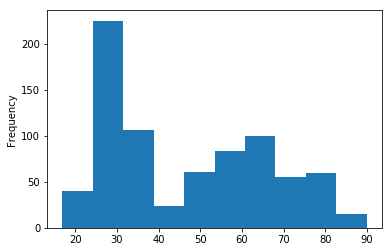

In [134]:
y.plot(kind='hist',bins=10) 

In [136]:
y.median()



40.97

In [138]:
y.mean()

46.89496093749997

In [139]:
y.min()

16.949999999999999

In [140]:
y.max()

89.950000000000003

In [141]:
d=pd.DataFrame(y,columns=['y'])
d.loc[d['y']<=40,'y_category']='low'
d.loc[(d['y']>40) & (d['y'] < 65),'y_category'] = 'medium'
d.loc[d['y'] >= 65,'y_category'] ='high'

In [157]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,d,test_size=0.2,random_state=10)

In [158]:
y_final_train=pd.get_dummies(data=y_train['y_category'])

In [159]:
#sc=MinMaxScaler()
#X_train=sc.fit_transform(X_train)

In [163]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu',kernel_initializer='normal'))
model.add(Dense(8, activation='relu', kernel_initializer='normal'))
model.add(Dense(3, activation='sigmoid', kernel_initializer='normal'))

In [164]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [166]:
model.fit(X_train, y_final_train, epochs=200, batch_size=20)

Epoch 1/200
614/614 [==============================] - 1s 854us/step - loss: 0.6126 - acc: 0.6591
Epoch 2/200
614/614 [==============================] - 0s 83us/step - loss: 0.5874 - acc: 0.6824
Epoch 3/200
614/614 [==============================] - 0s 77us/step - loss: 0.5628 - acc: 0.7524
Epoch 4/200
614/614 [==============================] - 0s 77us/step - loss: 0.5223 - acc: 0.7801
Epoch 5/200
614/614 [==============================] - 0s 82us/step - loss: 0.4609 - acc: 0.8355
Epoch 6/200
614/614 [==============================] - 0s 81us/step - loss: 0.4020 - acc: 0.8143
Epoch 7/200
614/614 [==============================] - 0s 75us/step - loss: 0.3622 - acc: 0.8176
Epoch 8/200
614/614 [==============================] - 0s 78us/step - loss: 0.3375 - acc: 0.8154
Epoch 9/200
614/614 [==============================] - 0s 77us/step - loss: 0.3231 - acc: 0.8105
Epoch 10/200
614/614 [==============================] - 0s 80us/step - loss: 0.3148 - acc: 0.8143
Epoch 11/200
614/614 [======

614/614 [==============================] - 0s 78us/step - loss: 0.2419 - acc: 0.8936
Epoch 167/200
614/614 [==============================] - 0s 77us/step - loss: 0.2386 - acc: 0.9077
Epoch 168/200
614/614 [==============================] - 0s 72us/step - loss: 0.2393 - acc: 0.9012
Epoch 169/200
614/614 [==============================] - 0s 91us/step - loss: 0.2363 - acc: 0.9061
Epoch 170/200
614/614 [==============================] - 0s 86us/step - loss: 0.2376 - acc: 0.9017
Epoch 171/200
614/614 [==============================] - 0s 112us/step - loss: 0.2372 - acc: 0.9055
Epoch 172/200
614/614 [==============================] - 0s 104us/step - loss: 0.2386 - acc: 0.8958
Epoch 173/200
614/614 [==============================] - 0s 104us/step - loss: 0.2376 - acc: 0.9093
Epoch 174/200
614/614 [==============================] - 0s 85us/step - loss: 0.2385 - acc: 0.8947
Epoch 175/200
614/614 [==============================] - 0s 91us/step - loss: 0.2437 - acc: 0.8909
Epoch 176/200
614/614

In [168]:
y_final_test=pd.get_dummies(data=y_test['y_category'])
scores = model.evaluate(X_test, y_final_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

154/154 [==============================] - 0s 52us/step

acc: 90.91%


# Report
#############################################################################

#### * Basic Explorataory analysis was performed on the dataset.
#### * Since there are two dependent variables I have evaluated two models one with heat_loading and the other with cool_loading.
#### *  Basic models such as linear regression ,Ridge Regression , lasso regression,decision Tree Regressor were evaluate and their R2 score was computed.
#### * As expected Decision Tree has the highest test and train scores and it is over fitting. 
#### * Ensemble methods such as Random Forest , Bagging , Ada boost were used on both the models and their test and train score were evaluated.
#### *  At last using Neural Network I  have classified the combined heating and cooling load (total load) as low,medium,high with a 90.91% Accuracy